Define values for Data Points

In [249]:
!pip install numpy
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

# Define Sigma Values

In [251]:
sigma_list = np.linspace(0.1, 4, num = 40 ,dtype=float)
sigma_list=np.round(sigma_list,1)
print(sigma_list)
print(sigma_list.shape)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4. ]
(40,)


# Initialise performance variables

In [252]:
accuracy_list_1=[]
accuracy_list_2=[]
accuracy_list_3=[]


# RBF Network Class

In [253]:
# class RBF_nn(network):
    
#     # Returns list of values that x1,x2 can take
#     def __init__(self,sigma_vals=sigma_list,network,clusters=None):
#         self.sigmas=sigma_list
#         self.clusters=clusters
#         self.network=network
        
#     #Here i=0,1,2...20, returns float
#     def value_func(self,i):
#         return round(-2+0.2*i,2)
    
#     def value_gen(self,max_val):
#         i_list = np.linspace(0, 20, num = (max_val+1),dtype=int)
#         print("Range of i and j is : ",i_list) # Gives the range of i,j
#         values_list=list(map(self.value_func,i_list))
#         print("List of values",values_list)
#         return values_list
    
#     def random_train_samples(self,value_list):
#         train_data = []
#         for num_samples in range(441):
#             row = []  
#             for num_features in range(2):
#                 row.append(random.choice(value_list))
#             train_data.append(row) 
#         train_data=np.array(train_data)
#         return train_data

#     def train_labels(self,train_data):
#         labels=[]       #Output Labels
#         square_sum=[]   # To evaluate (x1^2 + x2^2) , returns (441,1)
#         for i in range(train_data.shape[0]):
#             square_sum.append(squared_sum(train_data[i]))
#             if squared_sum(train_data[i])<=1:
#                 labels.append(1)
#             else:
#                 labels.append(-1)
#         labels=np.array(labels)
#         labels=np.reshape(labels,(441,1))
#         square_sum=np.array(square_sum)
#         square_sum=np.reshape(square_sum,(441,1))
#         return labels,square_sum

#     def create_df(self,np_array,op_labels,squared_op):
#         columns=['x1','x2']
#         df=pd.DataFrame(np_array,columns=columns)
#         df['Squares']=squared_op
#         df['Output']=op_labels
#         return df

#     def rbf_centres_all(self,train_data):
#         return train_data

#     def gaussian_kernel(self,ip_array, center_vector, sigma):
#         x=np.exp(-np.linalg.norm(ip_array - center_vector)**2 / (2 * sigma**2))
#         return x


#     def rbf_layer_output(self,train_data,centres,sigma):
#         phi = np.zeros((train_data.shape[0], centres.shape[0]))

#         for i in range(train_data.shape[0]):
#             for j in range(centres.shape[0]):
#                 phi[i, j] = gaussian_kernel(train_data[i], centres[j], sigma)
#         return phi

#     def weights(self,rbf_output,op_labels):
#         G_pinv=np.linalg.pinv(rbf_output)
#         D=op_labels
#         W=np.dot(G_pinv,D)
#         return W
    
#      def predict(self,W,G):
#         Y=np.dot(G,W)
#         Y=np.array(Y)
#         Y=np.sign(Y)
#         return Y
    
#     def plot(self,train_data,Y):
#         inside_circle = train_data[Y.flatten() == 1.0]
#         outside_circle = train_data[Y.flatten() == -1.0]

#         # Plotting
#         plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
#         plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
#         plt.xlabel('x1')
#         plt.ylabel('x2')
#         plt.title('Points Inside and Outside Circle')
#         plt.legend()
#         plt.show()
        
#     def accuracy(self, Y , op_labels):
#         accuracy = np.mean(Y == op_labels) * 100
#         return ("Accuracy: {:.2f}%".format(accuracy))
    
#     def calculate_mse(self,predictions, actual_labels):
#         return np.mean((predictions - actual_labels) ** 2)*100

        
    
    


    


    

# Functions to create Dataset

In [254]:
#Here i=0,1,2...20, returns float
def value_func(i):
    return round(-2+0.2*i,2)

# Returns list of values that x1,x2 can take
def value_gen(max_val):
    i_list = np.linspace(0, 20, num = 21,dtype=int)
    print("Range of i and j is : ",i_list) # Gives the range of i,j
    values_list=list(map(value_func,i_list))
    print("List of values",values_list)
    return values_list

#Returns a 441x2 np_array which is the training data. 441 samples with 2 input features each
def random_train_samples(value_list):
    train_data = []
    for num_samples in range(441):
        row = []  
        for num_features in range(2):
            row.append(random.choice(value_list))
        train_data.append(row) 
    train_data=np.array(train_data)
    return train_data

# train_pt is a 1x2 np array, returns int
def squared_sum(train_pt):
    return (train_pt[0]**2)+(train_pt[1]**2)

# Returns a 441x1 np array containing the output labels as per f(x1,x2)
def train_labels(train_data):
    labels=[]       #Output Labels
    square_sum=[]   # To evaluate (x1^2 + x2^2) , returns (441,1)
    for i in range(train_data.shape[0]):
        square_sum.append(squared_sum(train_data[i]))
        if squared_sum(train_data[i])<=1:
            labels.append(1)
        else:
            labels.append(-1)
    labels=np.array(labels)
    labels=np.reshape(labels,(441,1))
    square_sum=np.array(square_sum)
    square_sum=np.reshape(square_sum,(441,1))
    return labels,square_sum
            




# Functions to create Centres

In [255]:
#returns rbf centres-441x2 matrix
def rbf_centres_all(train_data):
    return train_data

def rbf_centres_random(train_data):
    rbf_centres =np.empty((150,2))
    for num_samples in range(150):
        rbf_centres[num_samples]=random.choice(train_data)
    return rbf_centres

def rbf_kmeans(train_data,K):
    kmeans = KMeans(n_clusters=K,n_init='auto').fit(train_data)
    centres=kmeans.cluster_centers_
    return centres


# Functions for Interpolation

In [256]:
def gaussian_kernel(ip_array, center_vector, sigma):
    x=np.exp(-np.linalg.norm(ip_array - center_vector)**2 / (2 * sigma**2))
    return x



def rbf(train_data,centres,sigma):
    phi = np.zeros((train_data.shape[0], centres.shape[0]))
    for i in range(train_data.shape[0]):
        for j in range(centres.shape[0]):
            phi[i, j] = gaussian_kernel(train_data[i], centres[j], sigma)
    return phi

def weights(rbf_output,op_labels):
    G_pinv=np.linalg.pinv(rbf_output)
    D=op_labels
    W=np.dot(G_pinv,D)
#     print(" Shape of W is : ",W.shape)
    return W

def predict(W,G):
#     Y=np.dot(W.T,G)
    Y=np.dot(G,W)
    Y=np.array(Y)
    Y=np.sign(Y)
#     print("Shape of Y is:",Y.shape)
    return Y


# Functions to evaluate performance

In [257]:
def calculate_accuracy(pred_op,actual_op):
    accuracy = np.mean(pred_op == actual_op) * 100
    return accuracy

def calculate_mse(pred_op,actual_op):
    mse= np.mean((pred_op - actual_op) ** 2)*100


# Functions to visualise data

In [258]:
def plot(train_data,labels,ptype):
    inside_circle = train_data[labels.flatten() == 1.0]
    outside_circle = train_data[labels.flatten() == -1.0]
    plot_type={1:"Train Points",2:"RBF-All",3:"RBF-Random",4:"RBF-KMeans"}

    # Plotting
    plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
    plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Points Inside and Outside Circle'+ plot_type[ptype])
    plt.legend()
    plt.show()

In [259]:
def acc_plot(acc_list,sig_list):
    plt.plot(sig_list,acc_list)
    
    plt.xlabel('Sigma')
    plt.ylabel('Accuracy in %')
    plt.title('Sigma v/s Accuracy Graph')

# RBF Function

In [260]:
def RBF_NN(train_data,op_labels,sigma):
    rbf_centres=rbf_centres_all(train_data)
    rbf_output=rbf(train_data,rbf_centres,sigma)
    W=weights(rbf_output,op_labels)
    Y=predict(W,rbf_output)
    accuracy=calculate_accuracy(Y,op_labels)
    accuracy_list_1.append(accuracy)
#     plot(train_data,Y,2)
    
    
    
    
    

## Training Data

### List of values allowed

In [261]:
values_list=value_gen(20)

Range of i and j is :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
List of values [-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


### Save Training Samples

In [262]:
#Save train_data
train_data=random_train_samples(values_list)
data_df=pd.DataFrame(train_data,columns=['x1','x2'])


### Compute Actual Output Labels

In [263]:
# Save actual output labels and squared sum of x1, x2
op_labels,squared_op=train_labels(train_data)
print("Shape of Output labels is :",op_labels.shape)

data_df['(x1^2) + (x2^2)']=squared_op
data_df['Actual O/P']=op_labels
        

Shape of Output labels is : (441, 1)


### Display Training Data

In [264]:
# Training Data Frame
data_df

,x1,x2,(x1^2) + (x2^2),Actual O/P
0,1.0,0.0,1.00,1
1,-0.8,-0.6,1.00,1
2,0.6,1.6,2.92,-1
3,0.2,2.0,4.04,-1
4,-1.0,-2.0,5.00,-1
...,...,...,...,...
436,-1.6,0.6,2.92,-1
437,0.8,-0.2,0.68,1
438,-0.6,-0.2,0.40,1
439,-1.6,-0.2,2.60,-1


### Training Data Plot

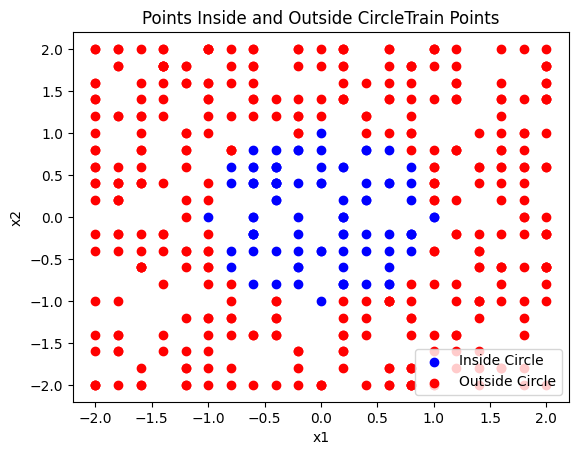

In [265]:
plot(train_data,op_labels,1)

## Find Centres

### 1 - Taking all Training Points as RBF Centres

In [266]:
rbf_centres_1=rbf_centres_all(train_data)   

In [267]:
rbf_all_output=rbf(train_data,rbf_centres_1,1)

In [268]:
W_all=weights(rbf_all_output,op_labels)

In [269]:
Y_all=predict(W_all,rbf_all_output)


In [270]:
calculate_accuracy(Y_all,op_labels)

100.0

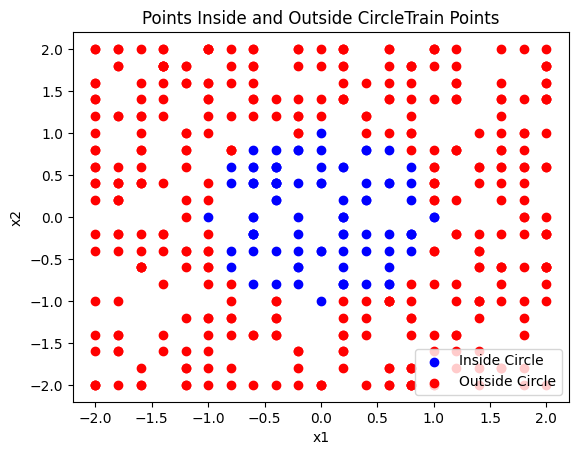

In [271]:
plot(train_data,op_labels,1)

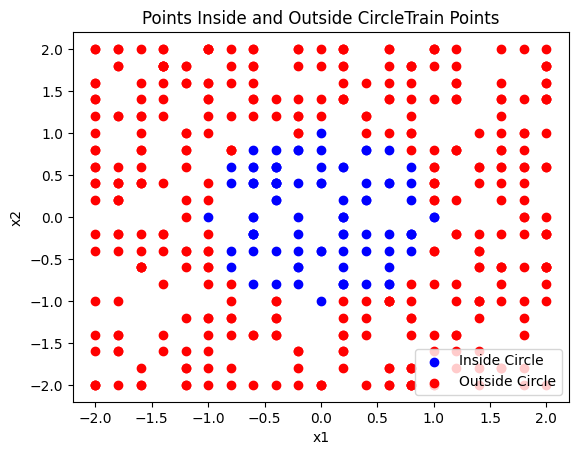

In [272]:
plot(train_data,Y_all,1)

In [273]:
for sigma in sigma_list:
    RBF_NN(train_data,op_labels,sigma)

In [274]:
accuracy_list_1

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.77324263038548,
 99.54648526077098,
 99.54648526077098,
 99.09297052154194,
 98.63945578231292,
 98.63945578231292,
 98.63945578231292,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.86621315192744,
 98.4126984126984,
 98.4126984126984,
 98.63945578231292,
 98.4126984126984,
 98.4126984126984,
 98.4126984126984,
 98.63945578231292,
 98.1859410430839,
 98.1859410430839,
 98.1859410430839,
 98.1859410430839,
 98.1859410430839,
 98.1859410430839,
 98.1859410430839]

In [275]:
len(accuracy_list)

NameError: name 'accuracy_list' is not defined

ValueError: x and y must have same first dimension, but have shapes (40,) and (76,)

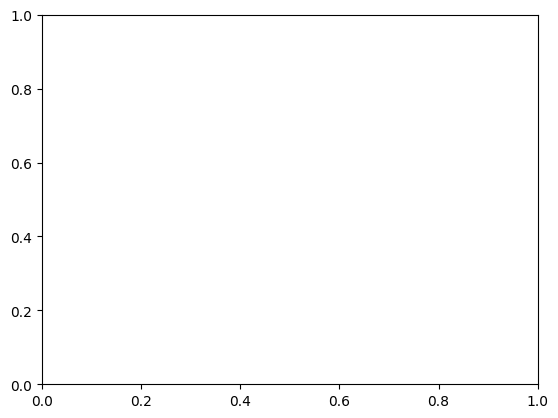

In [242]:
acc_plot(accuracy_list_1,sigma_list)

In [ ]:
plot(train_data,Y_rand,2)

In [ ]:
plot(train_data,Y_km,3)

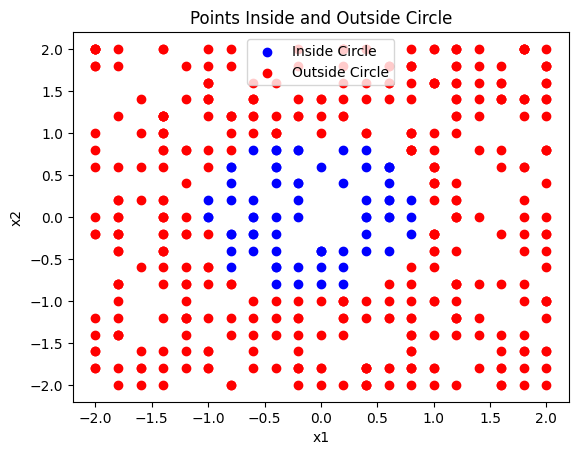

In [30]:
# inside_circle = train_data[Y.flatten() == 1.0]
# outside_circle = train_data[Y.flatten() == -1.0]

# # Plotting
# plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
# plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Points Inside and Outside Circle')
# plt.legend()
# plt.show()


In [31]:
(pd.DataFrame(rbf_output)).to_csv('rbf.csv',index=True)

# Randomly Sampled Centres (150)

In [33]:
rbf_centres_rand=rbf_centres_random(train_data)

In [54]:
# Comparing RBF Centres for all and random

rbf_df_all=pd.DataFrame(rbf_centres,columns=['x1_all','x2_all'])
rbf_df_rand=pd.DataFrame(rbf_centres_rand,columns=['x1_rand','x2_rand'])
rbf_df_all.join(rbf_df_rand)



,x1_all,x2_all,x1_rand,x2_rand
0,-1.6,-0.6,-1.6,-1.6
1,1.2,-0.8,-1.4,-0.4
2,-0.8,1.8,-1.8,-1.8
3,1.6,-0.8,-1.4,0.6
4,-1.4,-1.6,1.0,-1.8
...,...,...,...,...
436,-1.0,-0.6,NaN,NaN
437,0.0,-0.4,NaN,NaN
438,1.8,-1.8,NaN,NaN
439,-1.4,-0.4,NaN,NaN


In [34]:
rbf_output_rand=rbf(train_data,rbf_centres_rand,3)

In [35]:
rbf_output_rand.shape

(441, 150)

In [36]:
W_random=weights(rbf_output_rand,op_labels)

(150, 441)
(441, 1)
(150, 1)


In [37]:
W_random.shape

(150, 1)

In [38]:
Y_random=predict(W_random,rbf_output_rand)
Y_random.shape




(441, 1)

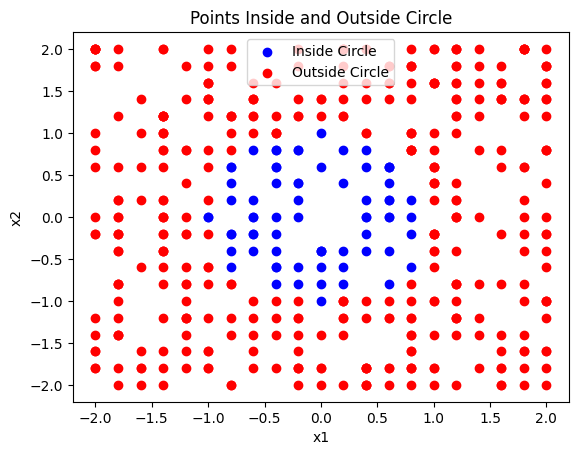

In [40]:
plot(train_data,op_labels)

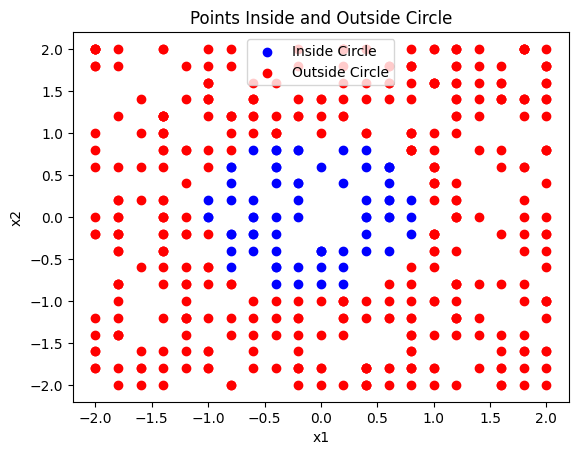

In [41]:
plot(train_data,Y_random)

In [42]:
accuracy = np.mean(Y_random == op_labels) * 100
print("Accuracy: {:.4f}%".format(accuracy))

Accuracy: 98.8662%


# K- Means Centres

In [44]:
rbf_centres_km=rbf_kmeans(train_data,120)
print(rbf_centres_km.shape)
print(rbf_centres_km)

(120, 2)
[[ 1.60000000e+00 -1.50000000e+00]
 [-2.00000000e-01  4.50000000e-01]
 [-1.86666667e+00 -1.33333333e+00]
 [ 1.00000000e+00  9.00000000e-01]
 [-1.45000000e+00  1.00000000e+00]
 [-1.50000000e-01 -1.30000000e+00]
 [ 1.40000000e+00  1.60000000e+00]
 [ 1.06666667e+00 -4.00000000e-01]
 [-5.00000000e-01  1.60000000e+00]
 [-1.40000000e+00 -3.20000000e-01]
 [ 4.66666667e-01 -1.80000000e+00]
 [-1.80000000e+00  1.90000000e+00]
 [ 1.86666667e+00  6.66666667e-02]
 [-1.00000000e-01 -7.00000000e-01]
 [-7.33333333e-01 -1.93333333e+00]
 [ 5.60000000e-01  1.68000000e+00]
 [ 2.00000000e+00  1.60000000e+00]
 [-5.66666667e-01 -3.33333333e-02]
 [-9.00000000e-01 -1.20000000e+00]
 [ 7.00000000e-01 -1.20000000e+00]
 [ 3.00000000e-01  6.50000000e-01]
 [-9.75000000e-01  1.77500000e+00]
 [ 1.96000000e+00 -1.04000000e+00]
 [-2.00000000e+00 -1.33333333e-01]
 [ 2.00000000e-01  1.26666667e+00]
 [ 8.00000000e-01 -1.60000000e+00]
 [ 2.00000000e+00  8.00000000e-01]
 [-4.80000000e-01  9.60000000e-01]
 [ 1.066666

In [45]:
rbf_output_km=rbf(train_data,rbf_centres_km,3)
print(rbf_output_km.shape)

(441, 120)


In [46]:
W_km=weights(rbf_output_km,op_labels)
print(W_km.shape)

(120, 441)
(441, 1)
(120, 1)
(120, 1)


In [47]:
Y_km=predict(W_km,rbf_output_km)
Y_km.shape

(441, 1)

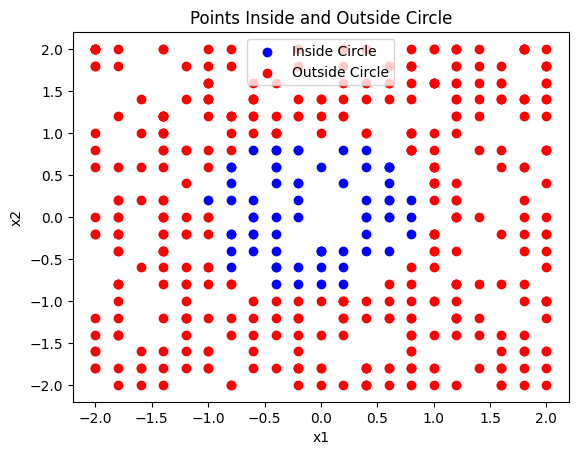

In [48]:
plot(train_data,Y_km)

In [50]:
accuracy = np.mean(Y_km == op_labels) * 100
print("Accuracy: {:.4f}%".format(accuracy))

Accuracy: 98.4127%
